In [ ]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 62kB/s 
     |████████████████████████████████| 501kB 41.2MB/s 
     |████████████████████████████████| 3.1MB 47.0MB/s 
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals

#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 images in 10 categories.The images show individual articles of clothing at low resolution (28x28)pixels..

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify the images.You can access the Fashion MNIST directly from Tensorflow.Import and load Fashion MNIST data directly from Tensorflow.

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


             Label        Class
             0            T-Shirt/Top
             1            Trouser
             2            Pullover
             3            Dress
             4            Coat
             5            Sandal
             6            Shirt
             7            Sneaker
             8            Bag
             9            Ankle Boot

In [ ]:
class_name=['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# Explore the data
Let's explore the format of the dataset before training the model.The following shows there are 60,000 images in the training set,with each image represented as 28 x 28 pixels.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
#Likewise there are 60,000 labels in the training set:
len(train_labels)

60000

# Preprocess the data
The data must be preprocessed before training the network.If you inspect the first image in the training set,you will see that the pixel values fall in the range of 0 to 255:

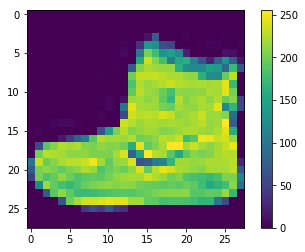

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding them to a neural networking model.To do so,we divide the value by 255.It's important that the training set and the testing set be preprocessed in the same way.

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

To verify that the data in th3e correct format and that we're ready to build and train the network,let's display the first 25 images from the training set and display the class name below each image. 

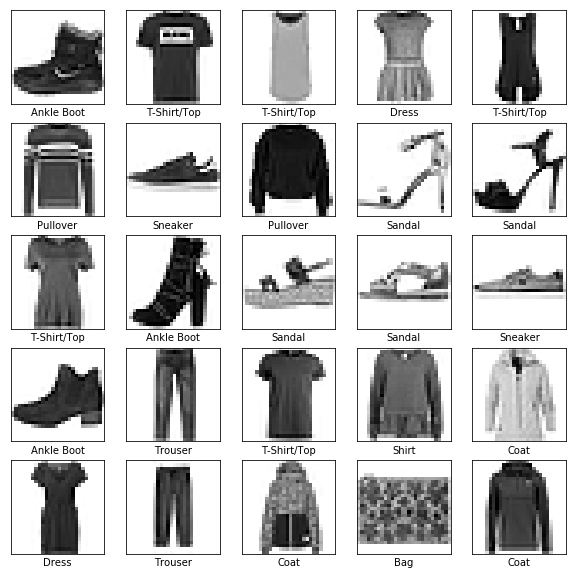

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

# Build the model
Building the neural network requires configuring the the layers of the model,then compiling the model.

# Setup the layers

In [ ]:
models = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# Compile the model
Before the model us ready for training,it needs a few more settings.These are added during the model's compile sep:


*   Loss function - This measures how accurate the model is during training.We want to minimize this function to "steer" the model in right direction.
*   Optimizer - Ths is how the model is updated based on the data it sees and its loss function.

*   Metrics - Used to monitor the training and testing steps.The following example uses accuracy,the fraction of the images that are correctly classified.





In [ ]:
models.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
Training the neural network model requires the following steps:

1.   Feed the training datato the model.In this example,the training data is in the train_images and train_labels arrays.
2.   The model learns to associate images and labels.

1.   We ask th model to make predictions about a test set - in this example,the test_images array.We verify that the predictions match the labels from the test_labels array.





In [ ]:
#To start training,call the model.fit method because it "fits" the model to the training data.
models.fit(train_images,train_labels,epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 1.0809 - accuracy: 0.6679
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.6383 - accuracy: 0.7692
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5632 - accuracy: 0.7981
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5215 - accuracy: 0.8150
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4940 - accuracy: 0.8266
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4743 - accuracy: 0.8331
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4591 - accuracy: 0.8386
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4471 - accuracy: 0.8436
Epoch 9/10
60000/60000 [===

As the model trains,the loss and accuracy metrics are displayed.This model reaches an accuracy of about 0.88 on the training data.

# Evaluate accuracy
Next compare how the model performs on the test dataset.

In [ ]:
test_loss,test_acc=models.evaluate(test_images,test_labels)
print("Test accuracy=",test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.4587 - accuracy: 0.8364
Test accuracy= 0.8364


It turns out that the accuracy on the test dataset is a little less than train accuracy on the training dataset.This gap between training and test accuracy represents the overfitting.Overfitting is when a machine learning model performs on new,previously unseen inputs than on the training data.

# Make predictions
When the model trained,we can usen it to make predictions about some images.

In [ ]:
predictions = models.predict(test_images)

In [ ]:
#First prediction
predictions[0]

array([6.5173504e-07, 6.9649133e-08, 4.1845096e-06, 3.8585918e-06,
       1.2764766e-05, 1.7184483e-01, 1.6620679e-05, 3.4442252e-01,
       6.6587166e-03, 4.7703570e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle_boot.

In [ ]:
test_labels[0]

9

We can graph thiis to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
   
  plt.xlabel("{} {:2.0f}% ({}) ".format(class_name[predicted_label],
                                        100*np.max(predictions_array),
                                        class_name[true_label]),
                                        color=color)
 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image,predictions, and prediction array.

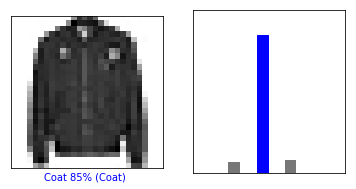

In [ ]:
i=79
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

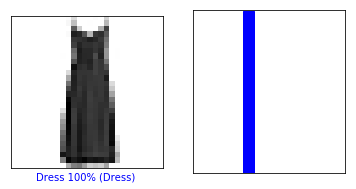

In [ ]:
i=13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

Let's plot several images with their predictions .Correct prediction labela are blue and incorrect label predictions are red.The number gives percentage(out of 100)for the predicted label>Note that the model can be wrong even when every confident.

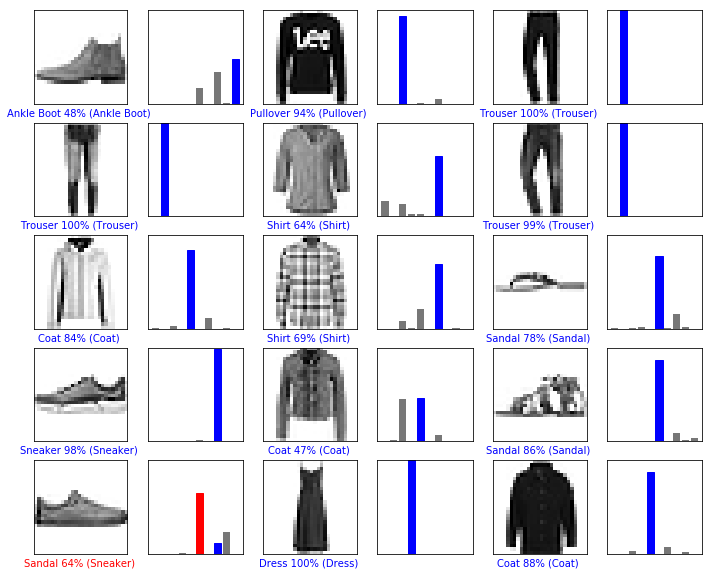

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows,2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally use the trained model to make a prediction about a single image.

In [ ]:
img = test_images[780]
print(img.shape)

(28, 28)


tf.keras.models are optimized to make predictions on a batch,or collection,of examplesat once.Accordingly,even though we're using a single image,we need to add it to a list:

In [ ]:
#Add the image to batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = models.predict(img)
print(predictions_single)

[[3.9642825e-07 1.5112866e-08 4.0317218e-07 1.2457312e-07 1.2485641e-07
  9.7946294e-02 3.0664542e-06 2.6060289e-03 1.6757144e-04 8.9927596e-01]]


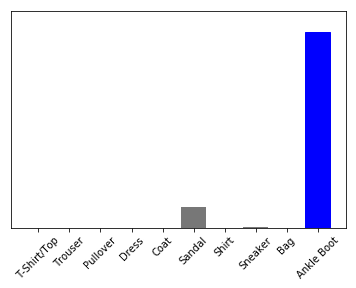

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_name, rotation=45)

model.predict returns a list of lists-one list for each imagein the batch of data.Grab the predictions for our(only) image in batch:

In [ ]:
np.argmax(predictions_single[0])

9

And as before the model predicts a label of 9.